In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import datetime
import matplotlib.colors as colors
import matplotlib as mpl
from matplotlib.colors import from_levels_and_colors
#from matplotlib.colors import DivergingNorm
from matplotlib.colors import TwoSlopeNorm
from cartopy.util import add_cyclic_point
import cartopy as cart
#import seaborn as sns
from scipy import signal

from numpy.random import seed
from numpy.random import randn
from numpy.random import normal
from scipy.stats import ttest_ind
from numpy.polynomial import Polynomial


In [2]:
tas_NH = xr.open_dataset('slo0042+slo0046+slo0050_echam6_BOT_mm_1001_8850_167_NH_ymean_fldmean.nc')
novolc_tas_NH = xr.open_dataset('novolc/slo0043_echam6_BOT_mm_1001-8850_167_NH_ymean_fldmean.nc')

In [3]:
tas_2sig = np.std(novolc_tas_NH['var167'][:,0,0], axis=0)*2

In [4]:
# Detrend nonvolc run
poly_nv = Polynomial.fit(novolc_tas_NH['time'], novolc_tas_NH['var167'][:,0,0], deg=2)

tas_novolc_detr = novolc_tas_NH['var167'][:,0,0] - poly_nv(novolc_tas_NH['time'])

In [5]:
tas_1sig_novolc = np.std(tas_novolc_detr[:], axis=0)
tas_2sig_novolc = np.std(tas_novolc_detr[:], axis=0)*2
tas_3sig_novolc = np.std(tas_novolc_detr[:], axis=0)*3

In [6]:
# Create time array
from skyfield import api
ts = api.load.timescale()
time = ts.tt(range(-6000, 1850)) 
time.tt_calendar()[0]

array([-6000, -5999, -5998, ...,  1847,  1848,  1849])

In [7]:
time = time.tt_calendar()[0]

In [8]:
aod = xr.open_dataset('forcing/eva_holo2.2_aod_550nm_echam_T63_sw_1001_8850_ym.nc')
sf = pd.read_csv('forcing/TSI_14C_cycle_yearly_cmip_v20160322_-6757-1849.csv')


In [9]:
# Calculate area weighted mean

def get_wghts(lat):

	latr = np.deg2rad(lat) # convert to radians

	weights = np.cos(latr) # calc weights

	return weights

In [10]:
lat = aod['lat'][:48]
wgts = get_wghts(lat)

aod_awa = np.average(aod['aod550'][:,:48], axis=1, weights=wgts)

In [ ]:
# Find cold years that are consecutive

def consecutive(data, stepsize=1):
    return np.split(data, np.where(np.diff(data) != stepsize)[0]+1)

In [22]:
# nonvolc run

cold_years_novol = np.array(np.where(tas_novolc_detr[:]<-tas_2sig_novolc)).flatten()
cold_years_novol_3sig = np.array(np.where(tas_novolc_detr[:]<-tas_3sig_novolc)).flatten()

In [23]:
consec_novolc = consecutive(cold_years_novol)
consec_novolc_3sig = consecutive(cold_years_novol_3sig)

In [24]:
multi_year = 0
for a in consec_novolc:
    if len(a) > 2:
        print(a)
        multi_year += 1
        
print(multi_year)

[2457 2458 2459]
[4523 4524 4525 4526 4527]
[6008 6009 6010 6011]
[6014 6015 6016 6017]
[7001 7002 7003]
[7674 7675 7676]
6


In [48]:
multiyr_novolc = []
multiyr_novolc_3sig = []

for a in consec_novolc:
    if len(a) > 2:
        multiyr_novolc.append(a)
        
for b in consec_novolc_3sig:
    if len(b) > 2:
        multiyr_novolc_3sig.append(b)
    
#np.shape(multiyr_novolc)

In [11]:
# volcanic run with detrending 

poly = Polynomial.fit(time, tas_NH['var167'][:,0,0], deg=2)
tas_NH_detr = tas_NH['var167'][:,0,0] - poly(time)

In [12]:
tas_NH_std = np.std(tas_NH_detr, axis=0)

In [13]:
tas_NH_2sig = tas_NH_std*2
tas_NH_3sig = tas_NH_std*3

In [14]:
#cold_years_detr = np.array(np.where(tas_detr[:,0,0]<-tas_2sig_novolc)).flatten()
cold_years_detr = np.array(np.where(tas_NH_detr[:]<-tas_NH_2sig)).flatten()
cold_years_detr_3sig = np.array(np.where(tas_NH_detr[:]<-tas_NH_3sig)).flatten()

In [17]:
consec_detr = consecutive(cold_years_detr)
consec_detr_3sig = consecutive(cold_years_detr_3sig)

In [18]:
multi_year = 0

for a in consec_detr:
    if len(a) > 2:
        print(a)
        multi_year += 1
        
#print(multi_year)

[76 77 78]
[375 376 377 378 379 380]
[412 413 414]
[421 422 423]
[534 535 536]
[692 693 694]
[770 771 772 773 774 775 776 777]
[1060 1061 1062 1063]
[1284 1285 1286 1287]
[1294 1295 1296]
[1396 1397 1398 1399]
[1464 1465 1466 1467 1468]
[1497 1498 1499]
[1621 1622 1623 1624 1625 1626 1627]
[1635 1636 1637 1638]
[1664 1665 1666 1667]
[1971 1972 1973]
[2028 2029 2030 2031]
[2033 2034 2035 2036 2037]
[2058 2059 2060 2061 2062]
[2163 2164 2165 2166]
[2480 2481 2482]
[2547 2548 2549 2550 2551 2552]
[2847 2848 2849 2850]
[2872 2873 2874]
[2879 2880 2881 2882 2883]
[3086 3087 3088 3089 3090]
[4342 4343 4344 4345 4346]
[4370 4371 4372]
[4415 4416 4417]
[4575 4576 4577 4578]
[4591 4592 4593]
[4825 4826 4827 4828]
[5276 5277 5278 5279]
[5571 5572 5573 5574 5575]
[5860 5861 5862 5863]
[5951 5952 5953 5954 5955 5956]
[6535 6536 6537]
[6539 6540 6541 6542 6543]
[6573 6574 6575 6576]
[6625 6626 6627]
[7229 7230 7231 7232]
[7257 7258 7259 7260 7261 7262]
[7457 7458 7459 7460 7461]
[7599 7600 7601]
[7

In [26]:
max_aod_bfcold_detr = []
max_int_bfcold_detr = []
max_int_bfcold_novolc_detr = []

max_aod_bfcold_3sig_detr = []
max_int_bfcold_3sig_detr = []
max_int_bfcold_novolc_3sig_detr = []

for period in multiyr_detr:
    max_aod_bfcold_detr.append(np.nanmax(aod_awa[period[0]+1]))
    max_int_bfcold_detr.append(period[0]+1) 
    
for period2 in multiyr_novolc:
    max_int_bfcold_novolc_detr.append(period2[0]+1) 
    
for period3 in multiyr_detr_3sig:
    max_aod_bfcold_3sig_detr.append(np.nanmax(aod_awa[period3[0]+1]))
    max_int_bfcold_3sig_detr.append(period3[0]+1) 
    
for period4 in multiyr_novolc_3sig:
    max_int_bfcold_novolc_3sig_detr.append(period4[0]+1) 
    

In [27]:
nonvolc_detr = np.where(np.array(max_aod_bfcold_detr)<0.08)

In [28]:
int_bfcold_detr = np.array(max_int_bfcold_detr)

In [29]:
int_nonvolc_detr = int_bfcold_detr[nonvolc_detr]

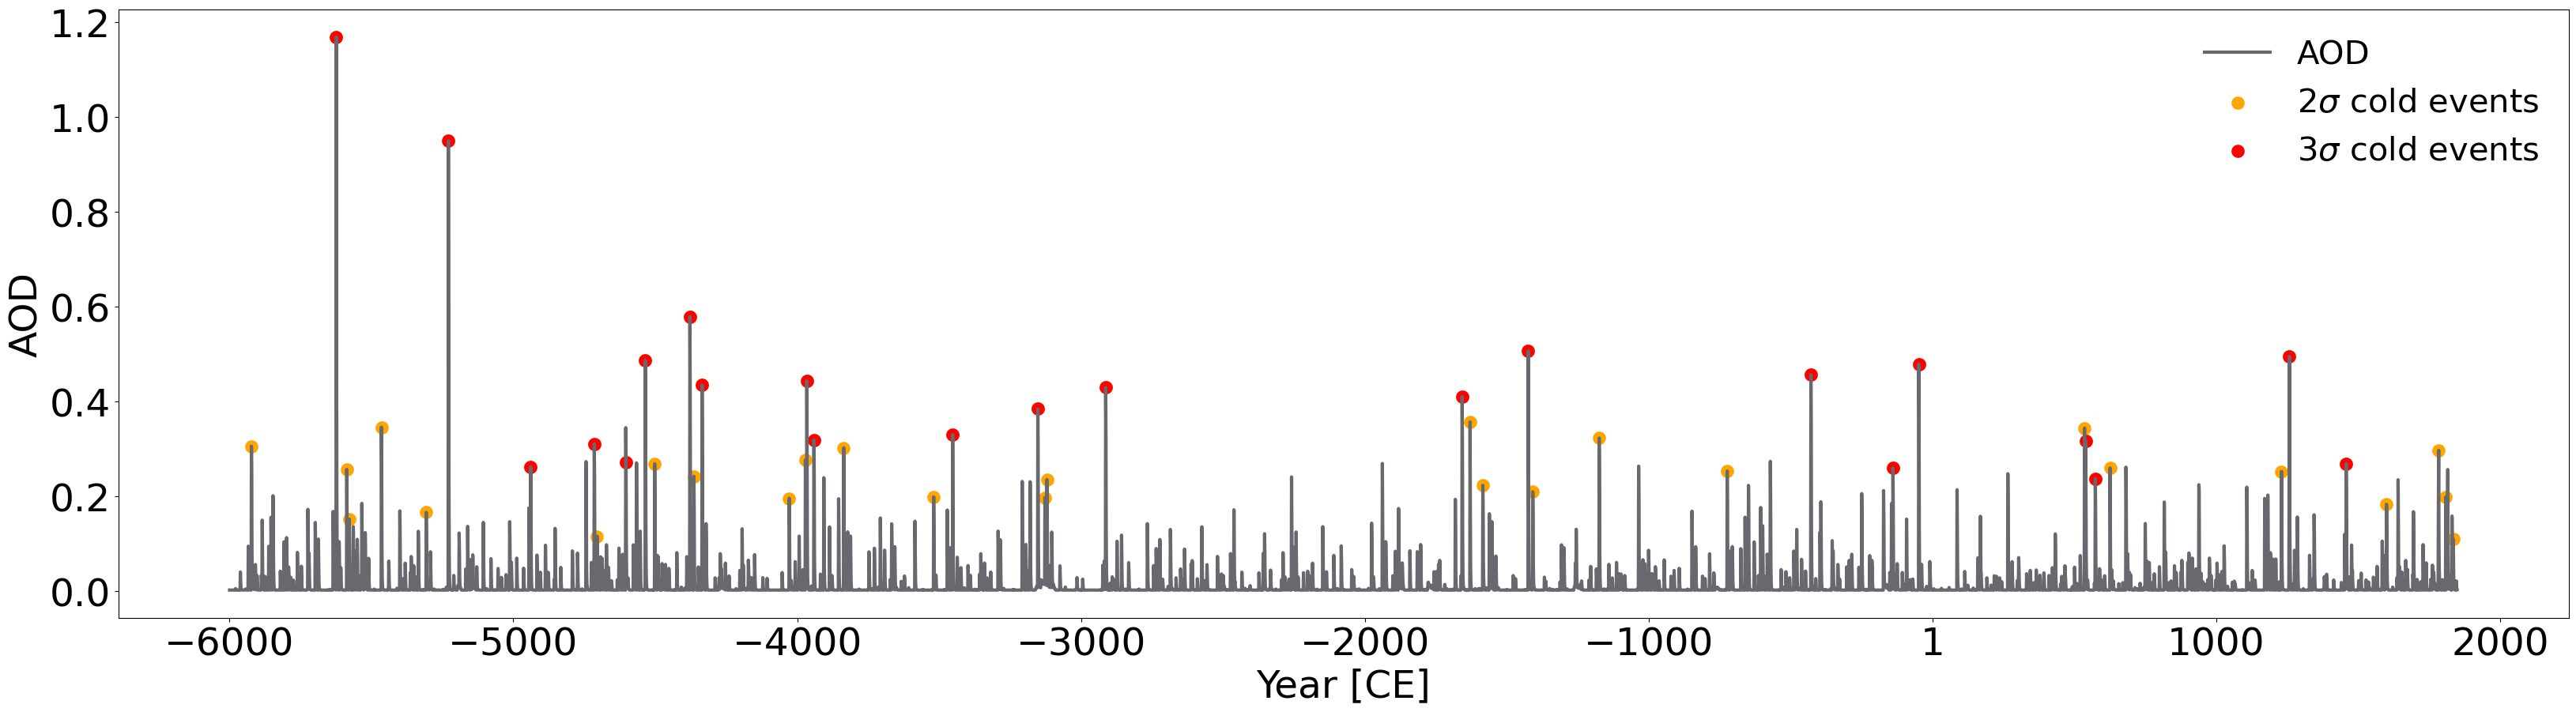

In [30]:
# First year of multiyear cold periods and AOD

from scipy.signal import find_peaks

fig = plt.figure(12, figsize= (40,10))

plt.plot(time,aod_awa[:], linewidth=3, color = '#67696f', label='AOD')

plt.scatter(time[max_int_bfcold_detr],aod_awa[max_int_bfcold_detr], c='orange', linewidths=6, label='$2\sigma$ cold events')
plt.scatter(time[max_int_bfcold_3sig_detr],aod_awa[max_int_bfcold_3sig_detr], c='red', linewidths=6, label='$3\sigma$ cold events')

plt.ylabel('AOD', fontsize=35)
plt.xlabel('Year [CE]', fontsize=35)
plt.xticks([-6000,-5000,-4000,-3000,-2000,-1000,1,1000,2000])
plt.legend(loc=1, fontsize=30, frameon=False)

plt.tick_params(labelsize=35)

#plt.savefig('figures/HolVol_AOD_>2yrcooling_detr_2sig_3sig_spline.png', bbox_inches = 'tight')

plt.show()

In [31]:
b = len(int_nonvolc_detr)
c = len(multiyr_detr)

a=100*b/c
a
100-a

100.0

In [49]:
len_multiyr = []
len_multiyr_novolc = []
len_multiyr_novolc_3sig = []
len_multiyr_detr = []
len_multiyr_detr_3sig = []
    
for period2 in multiyr_novolc:
    len_multiyr_novolc.append(len(period2))
    
for period3 in multiyr_detr:
    len_multiyr_detr.append(len(period3))
    
for period4 in multiyr_detr_3sig:
    len_multiyr_detr_3sig.append(len(period4))
    
for period5 in multiyr_novolc_3sig:
    len_multiyr_novolc_3sig.append(len(period5))

In [51]:
len_multiyr_xr = xr.DataArray(len_multiyr)
len_multiyr_xr

<xarray.DataArray (dim_0: 0)>
array([], dtype=float64)
Dimensions without coordinates: dim_0

In [52]:
len_multiyr_novolc_xr = xr.DataArray(len_multiyr_novolc)
len_multiyr_novolc_3sig_xr = xr.DataArray(len_multiyr_novolc_3sig)


In [53]:
len_multiyr_detr_xr = xr.DataArray(len_multiyr_detr)
len_multiyr_detr_3sig_xr = xr.DataArray(len_multiyr_detr_3sig)


In [54]:
# Separate the scatter plot in tropical vs extratropical eruptions

lats = []
lats_3sig = []

for i in max_int_bfcold_detr:
    a = np.where(aod['aod550'][i,:] == np.nanmax(aod['aod550'][i,:]))
    lats = np.append(lats, aod['lat'][a])
    
for i in max_int_bfcold_3sig_detr:
    a = np.where(aod['aod550'][i,:] == np.nanmax(aod['aod550'][i,:]))
    lats_3sig = np.append(lats_3sig, aod['lat'][a])

In [55]:
tropical = np.where((lats<40)&(lats>-40))
extratropical = np.where((lats>40))

tropical_3sig = np.where((lats_3sig<40)&(lats_3sig>-40))
extratropical_3sig = np.where((lats_3sig>40))


In [38]:
# Cumulative AOD for scatter plot
max_aod_acc_bfcold_detr = []
max_aod_acc_bfcold_3sig_detr = []

for period in multiyr_detr:
    max_aod_acc_bfcold_detr.append(np.cumsum(aod_awa[period[0]+1:period[0]+11]))
    
for period2 in multiyr_detr_3sig:
    max_aod_acc_bfcold_3sig_detr.append(np.cumsum(aod_awa[period2[0]+1:period2[0]+11]))

In [39]:
aod_acc_10yr_bfcold_detr = []
aod_acc_10yr_bfcold_3sig_detr = []

for i in np.arange(0,48,1):
    aod_acc_10yr_bfcold_detr.append(max_aod_acc_bfcold_detr[i][-1])
    
for i in np.arange(0,22,1):
    aod_acc_10yr_bfcold_3sig_detr.append(max_aod_acc_bfcold_3sig_detr[i][-1])
    
#aod_acc_10yr_bfcold_detr

Text(800, -15, 'Volcanic forcing')

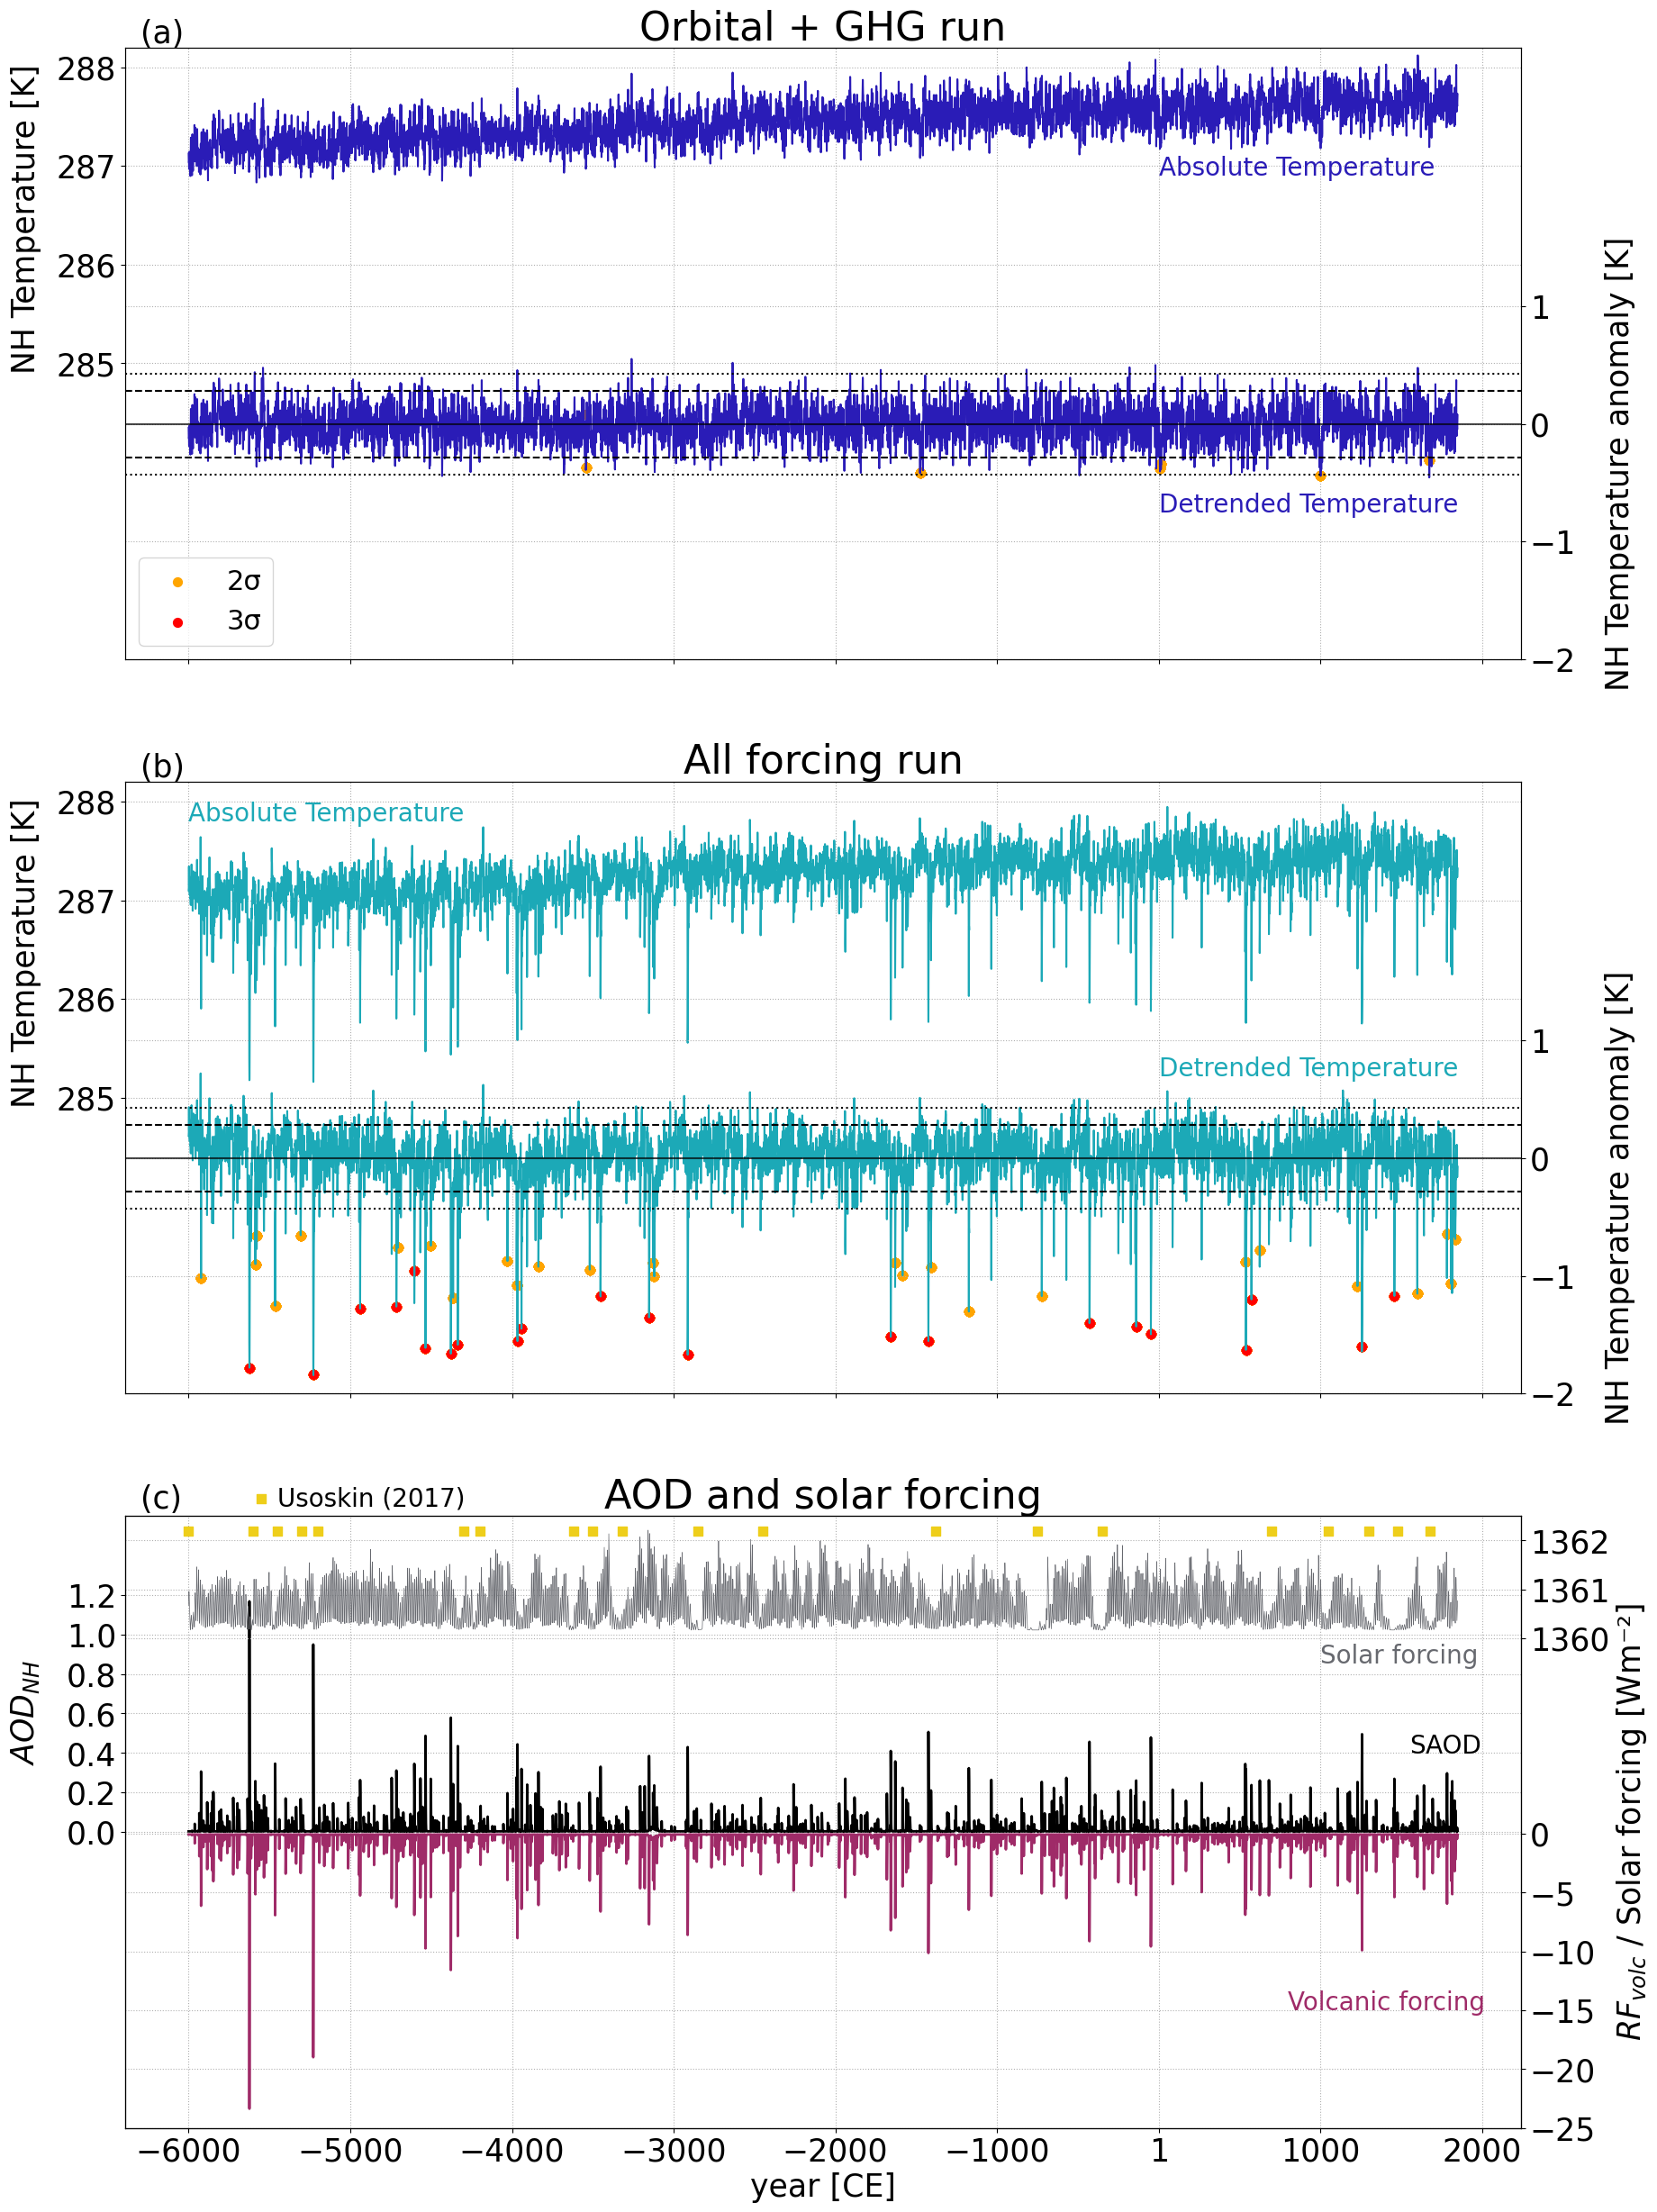

In [41]:
# Figure 1

fig, ax = plt.subplots(3, sharex=True, sharey=False, figsize=(20,30), 
                       gridspec_kw={'height_ratios': [2,2,2]})
fig.subplots_adjust(hspace = 0.2)

#-----------------------------------Temp2m novolc--------------------------------------------------------------

#ax[1].axhline(np.mean(novolc_tas_NH['var167'][:,0,0],axis=0), color='black')

ax[0].plot(time[:], novolc_tas_NH['var167'][:,0,0], color = '#2a1cb7')

ax[0].set_ylim(282,288.2)

ax[0].grid(linestyle=':')

ax[0].set_ylabel('NH Temperature [K]', fontsize=25)
ax[0].tick_params(labelsize=25)
ax[0].set_yticks([285,286,287,288])
ax[0].yaxis.set_label_coords(-.06,0.72)

ax[0].set_title('Orbital + GHG run',fontsize=32)

ax[0].text(-6300,288.25,'(a)', fontsize=25)
ax[0].text(1,286.9,'Absolute Temperature', color = '#2a1cb7', fontsize=20)

#-------------------------------------Temp2m novolc cold events-------------------------------------------------

ax0 = ax[0].twinx()

ax0.plot(time[:], tas_novolc_detr[:], color = '#2a1cb7')

for period in consec_novolc:
    ax0.scatter(time[max_int_bfcold_novolc_3sig_detr], tas_novolc_detr[max_int_bfcold_novolc_3sig_detr],s=50, color='red')
    ax0.scatter(time[max_int_bfcold_novolc_detr], tas_novolc_detr[max_int_bfcold_novolc_detr],s=50, color='orange')

ax0.scatter(time[max_int_bfcold_novolc_detr][0], tas_NH_detr[max_int_bfcold_novolc_detr][0],s=50, color='red', label = '3σ')
ax0.scatter(time[max_int_bfcold_novolc_detr][0], tas_NH_detr[max_int_bfcold_novolc_detr][0],s=50, color='orange', label = '2σ')
    
ax0.axhline(0, color='black', alpha=0.7)
ax0.axhline(0+tas_2sig_novolc, color='black', linestyle='dashed')
ax0.axhline(0-tas_2sig_novolc, color='black', linestyle='dashed')
ax0.axhline(0+tas_3sig_novolc, color='black', linestyle='dotted')
ax0.axhline(0-tas_3sig_novolc, color='black', linestyle='dotted')

ax0.grid(linestyle=':')
ax0.set_ylim(-2.0,3.2)
ax0.set_ylabel('NH Temperature anomaly [K]', fontsize=25)
ax0.tick_params(labelsize=25)
ax0.set_yticks([-2,-1,0,1])
ax0.yaxis.set_label_coords(1.06,0.32)

handles, labels = ax0.get_legend_handles_labels()
order = [1,0]

ax0.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='lower left',fontsize=22)
#ax0.set_title('Orbital + GHG run detrended + cold periods',fontsize=35)

ax0.text(1,-0.75,'Detrended Temperature', color = '#2a1cb7', fontsize=20)

#------------------------------------Temp2m volc----------------------------------------------------------------

#ax[2].axhline(np.mean(tas_NH['var167'][:,0,0],axis=0), color='black')
ax[1].plot(time[:],tas_NH['var167'][:,0,0], color = '#1ca9b7')

ax[1].grid(linestyle=':')

ax[1].set_ylim(282,288.2)
ax[1].set_ylabel('NH Temperature [K]', fontsize=25)
ax[1].tick_params(labelsize=25)
ax[1].set_yticks([285,286,287,288])
ax[1].yaxis.set_label_coords(-.06,0.72)

ax[1].set_title('All forcing run',fontsize=32)

ax[1].text(-6300,288.25,'(b)', fontsize=25)
ax[1].text(-6000,287.8,'Absolute Temperature', color = '#1ca9b7', fontsize=20)

#-----------------------------------Temp2m volc cold events--------------------------------------------------------------------

#ax[4].axhline(np.mean(tas_NH['var167'][:,0,0],axis=0), color='black')
ax1 = ax[1].twinx()

ax1.plot(time, tas_NH_detr[:], color = '#1ca9b7')

for period in consec_detr:
    ax1.scatter(time[max_int_bfcold_detr], tas_NH_detr[max_int_bfcold_detr],s=50, color='orange')
    ax1.scatter(time[max_int_bfcold_3sig_detr], tas_NH_detr[max_int_bfcold_3sig_detr],s=50, color='red')

ax1.axhline(0, color='black', alpha=0.7)
ax1.axhline(0+tas_2sig_novolc, color='black', linestyle='dashed')
ax1.axhline(0-tas_2sig_novolc, color='black', linestyle='dashed')
ax1.axhline(0+tas_3sig_novolc, color='black', linestyle='dotted')
ax1.axhline(0-tas_3sig_novolc, color='black', linestyle='dotted')

ax1.grid(linestyle=':')
ax1.set_ylim(-2.0,3.2)
ax1.set_ylabel('NH Temperature anomaly [K]', fontsize=25)
ax1.tick_params(labelsize=25)
ax1.set_yticks([-2,-1,0,1])
ax1.yaxis.set_label_coords(1.06,0.32)

#ax1.set_title('All forcing run detrended + cold periods',fontsize=32)

#ax[2].text(-6300,0.75,'(c)', fontsize=25)
ax1.text(1,0.7,'Detrended Temperature', color = '#1ca9b7', fontsize=20)

#------------------------------------AOD------------------------------------------------------------------

ax[2].plot(time[:],aod_awa[:], linewidth=2, color = 'black', label='AOD')

ax[2].grid(linestyle=':')

ax[2].set_ylim(-1.5,1.6)
#ax[2].yaxis.set_label_coords(-0.05, 0.8)
ax[2].set_ylabel(r'$AOD_{NH}$', fontsize=25)
ax[2].tick_params(labelsize=25)
ax[2].set_yticks(np.arange(0,1.4,0.2))
ax[2].yaxis.set_label_coords(-.06,0.68)

ax[2].set_title('AOD and solar forcing',fontsize=32)
ax[2].set_xlabel('year [CE]', fontsize=25)
ax[2].set_xticks([-6000,-5000,-4000,-3000,-2000,-1000,1,1000,2000])

ax[2].text(-6300,1.64,'(c)', fontsize=25)
ax[2].text(1550,0.4,'SAOD', color = 'black', fontsize=20)

#-------------------------------------SF---------------------------------------------------------------------
ax2 = ax[2].twinx()

x_solmin = [-6000,-5600,-5450,-5300,-5200,-4300,-4200,-3620,-3500,-3320,-2850,-2450,-1380,-750,-350,700,1050,
            1300,1480,1680]
y_solmin = [1362.2,1362.2,1362.2,1362.2,1362.2,1362.2,1362.2,1362.2,1362.2,1362.2,1362.2,1362.2,1362.2,1362.2,
            1362.2,1362.2,1362.2,1362.2,1362.2,1362.2]

ax2.plot(time[:],sf['sf'][757:], linewidth=.5, color = '#67696f', label='Solar forcing')
ax2.scatter(x_solmin,y_solmin,s=50,marker='s',color = '#eece1a')

ax2.scatter(-5550,1362.85, clip_on=False,s=50,marker='s', color = '#eece1a')
ax2.text(-5450,1362.7, 'Usoskin (2017)', fontsize = 20)

ax2.grid(linestyle=':')

ax2.set_ylim(1350,1362.5)
ax2.set_yticks([1360,1361,1362])
#ax2.yaxis.set_label_coords(1.07, 0.8)
ax2.set_ylabel(r'$RF_{volc}$ / Solar forcing [Wm⁻²]', fontsize=25)
ax2.tick_params(labelsize=25)

ax2.text(1000,1359.5,'Solar forcing', color = '#67696f', fontsize=20)

#-------------------------------------- RFnet ----------------------------------------------------------------
ax3 = ax[2].twinx()

ax3.plot(time[:],aod_awa[:]*-20, linewidth=2, color = '#9F2B68', label='AOD')

ax3.grid(linestyle=':')

#ax3.spines['left'].set_position(('axes',0)) #get double y-axis on left side
#ax3.yaxis.tick_left()
ax3.set_ylim(-25,27)
#ax3.yaxis.set_label_coords(1.07, 0.1)
#ax3.set_ylabel(r'$RF_{net}$', fontsize=25)
ax3.tick_params(labelsize=25)
ax3.set_yticks(np.arange(-25,5,5))

ax3.text(800,-15,'Volcanic forcing', color = '#9F2B68', fontsize=20)


#plt.savefig('figures/multipanel_timeseries_AOD_TSI_RFnet_tas_volc_novolc_-6000_1850_spline_solmin_legend2.png', bbox_inches = 'tight')

In [42]:
np.corrcoef(sf['sf'][757:],tas_NH_detr[:])

array([[1.        , 0.04360784],
       [0.04360784, 1.        ]])

In [43]:
np.corrcoef(aod_awa[:],tas_NH_detr[:])

array([[ 1.        , -0.60286995],
       [-0.60286995,  1.        ]])

In [44]:
# Calculate mean forcing Maunder & Spörer minimum

aod_Maunder = np.mean(aod_awa[7620:7721]*-20)#-np.mean(aod_awa[6001:7850]*-20)
sf_Maunder = np.mean(sf['sf'][8377:8421]-np.mean(sf['sf'][6758:8607]))

print(aod_Maunder, sf_Maunder)

-0.32138246 -0.2325452012148565


In [45]:
aod_Spörer = np.mean(aod_awa[7390:7561]*-20)#-np.mean(aod_awa[6001:7850]*-20)
sf_Spörer = np.mean(sf['sf'][8147:8318]-np.mean(sf['sf'][6758:8607]))

print(aod_Spörer, sf_Spörer)

-0.23589508 -0.3535888894773161


In [46]:
novolc_events = np.where(aod_awa[max_int_bfcold_detr] < 0.08)

Text(2.9, 2.04, '(d)')

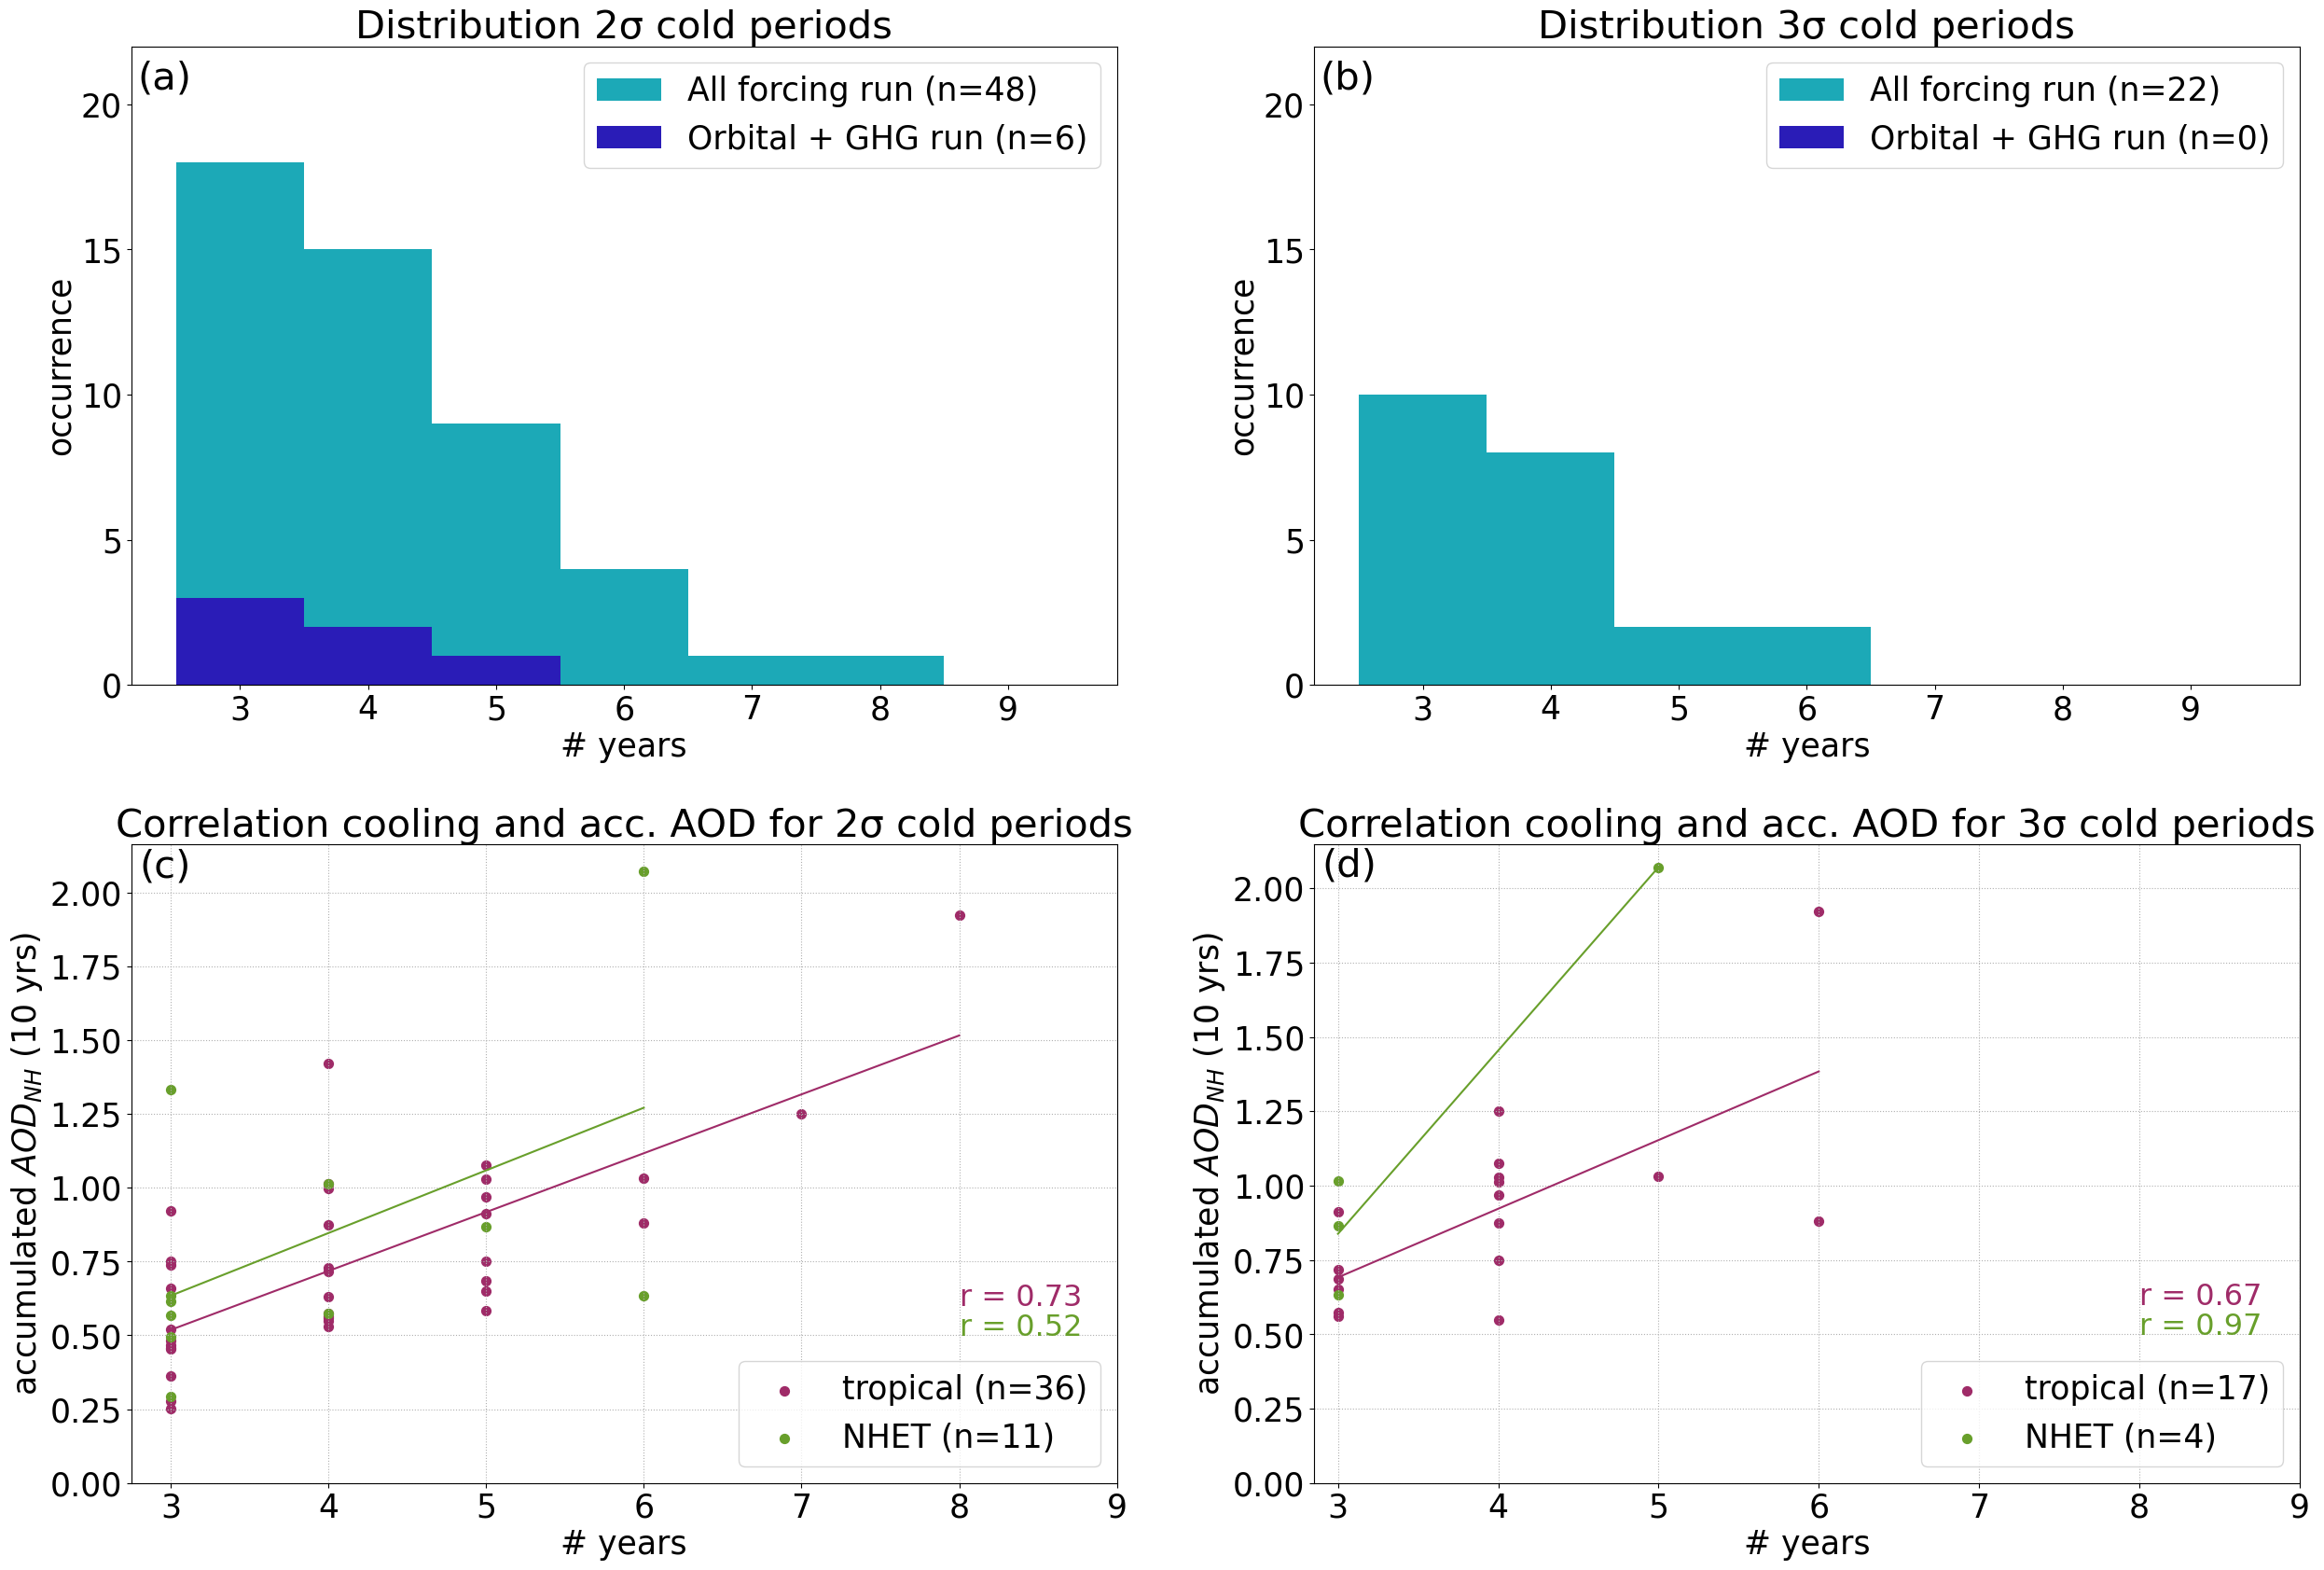

In [56]:
# Distribution plots 2/3 sigma and tropical/extratropical
import seaborn as sns

fig, axs = plt.subplots(2,2, figsize=(30,20))
fig.subplots_adjust(hspace = 0.25, wspace=0.2)

#------------------------------------- 2 sigma events ------------------------------------------------------------
ax1 = plt.subplot(2,2,1)
                  
n, bins, patches = ax1.hist(len_multiyr_detr_xr, 
    bins = [2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5], color = '#1ca9b7', label = 'All forcing run (n=48)')
n2, bins2, patches2 = ax1.hist(len_multiyr_novolc_xr, 
    bins = [2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5], color = '#2a1cb7', label = 'Orbital + GHG run (n=6)')

#ticks = [(patch._x0 + patch._x1)/2 for patch in patches]    
#ax1.set_xticks(ticks)
#sns.distplot(len(multiyr_novolc), hist = True, label = 'volcanic run')
#plt.grid(linestyle=':')
ax1.set_ylim(0,22)
ax1.set_yticks([0,5,10,15,20])
ax1.set_xlabel('# years', fontsize=25)
ax1.set_ylabel('occurrence', fontsize=25)
ax1.tick_params(labelsize=25)
ax1.legend(loc='upper right',fontsize=25)
#ax1.tight_layout()
ax1.set_title('Distribution 2σ cold periods',fontsize=30)

ax1.text(2.2,20.55,'(a)', fontsize=30)

#------------------------------------- 3 sigma events ------------------------------------------------------------
ax2 = plt.subplot(2,2,2)

n, bins, patches = ax2.hist(len_multiyr_detr_3sig_xr, 
    bins = [2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5], color = '#1ca9b7', label = 'All forcing run (n=22)')
n2, bins2, patches2 = ax2.hist(len_multiyr_novolc_3sig_xr, 
    bins = [2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5], color = '#2a1cb7', label = 'Orbital + GHG run (n=0)')

#ticks = [(patch._x0 + patch._x1)/2 for patch in patches]    
#ax2.set_xticks(ticks)
ax2.set_ylim(0,22)
ax2.set_yticks([0,5,10,15,20])
ax2.set_xlabel('# years', fontsize=25)
ax2.set_ylabel('occurrence', fontsize=25)
ax2.tick_params(labelsize=25)
ax2.legend(loc='upper right',fontsize=25)
#ax2.tight_layout()
ax2.set_title('Distribution 3σ cold periods',fontsize=30)

ax2.text(2.2,20.55,'(b)', fontsize=30)

# ---------------------------------- Scatter plot acc AOD 2 sig---------------------------------------------------
from scipy import stats

ax3 = plt.subplot(2,2,3)

x1 = np.array(len_multiyr_detr_xr)[tropical]
x2 = np.array(len_multiyr_detr_xr)[extratropical]
y1 = np.array(aod_acc_10yr_bfcold_detr)[tropical]
y2 = np.array(aod_acc_10yr_bfcold_detr)[extratropical]

ax3.scatter(x1, y1, s=50, color = '#9F2B68', label='tropical (n=36)')
ax3.scatter(x2, y2, s=50, color = '#689f2b', label='NHET (n=11)')

slope, intercept, r_value, p_value, std_err = stats.linregress(x1,y1)
ax3.plot(np.linspace(x1.min(),x1.max(),100), intercept+np.linspace(x1.min(),x1.max(),100)*slope, color = '#9F2B68')
#ax3.text(10.5,1.6,'r = '+str(round(r_value,2)), fontsize=23, color = '#1f77b4')
ax3.text(8,0.6,'r = '+str(round(r_value,2)), fontsize=23, color = '#9F2B68')
slope, intercept, r_value, p_value, std_err = stats.linregress(x2,y2)
ax3.plot(np.linspace(x2.min(),x2.max(),100), intercept+np.linspace(x2.min(),x2.max(),100)*slope, color = '#689f2b')
#ax3.text(10.5,1.5,'r = '+str(round(r_value,2)), fontsize=23, color = '#ff7f0e')
ax3.text(8,0.5,'r = '+str(round(r_value,2)), fontsize=23, color = '#689f2b')

ax3.grid(linestyle=':')
ax3.set_yticks([0,0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0])
ax3.set_xticks(np.arange(3,10,1))
ax3.set_xlabel('# years', fontsize=25)
ax3.set_ylabel(r'accumulated $AOD_{NH}$ (10 yrs)', fontsize=25)
ax3.tick_params(labelsize=25)
ax3.legend(loc='lower right',fontsize=25)

ax3.set_title('Correlation cooling and acc. AOD for 2σ cold periods',fontsize=30)

ax3.text(2.8,2.05,'(c)', fontsize=30)

# -------------------------------------------Scatter plot acc AOD 3 sig---------------------------------------------
ax4 = plt.subplot(2,2,4)

x1 = np.array(len_multiyr_detr_3sig_xr)[tropical_3sig]
x2 = np.array(len_multiyr_detr_3sig_xr)[extratropical_3sig]
y1 = np.array(aod_acc_10yr_bfcold_3sig_detr)[tropical_3sig]
y2 = np.array(aod_acc_10yr_bfcold_3sig_detr)[extratropical_3sig]

ax4.scatter(x1, y1, s=50, color = '#9F2B68', label='tropical (n=17)')
ax4.scatter(x2, y2, s=50, color = '#689f2b', label='NHET (n=4)')

slope, intercept, r_value, p_value, std_err = stats.linregress(x1,y1)
ax4.plot(np.linspace(x1.min(),x1.max(),100), intercept+np.linspace(x1.min(),x1.max(),100)*slope, color = '#9F2B68')
ax4.text(8,0.6,'r = '+str(round(r_value,2)), fontsize=23, color = '#9F2B68')
slope, intercept, r_value, p_value, std_err = stats.linregress(x2,y2)
ax4.plot(np.linspace(x2.min(),x2.max(),100), intercept+np.linspace(x2.min(),x2.max(),100)*slope, color = '#689f2b')
ax4.text(8,0.5,'r = '+str(round(r_value,2)), fontsize=23, color = '#689f2b')

ax4.grid(linestyle=':')
ax4.set_yticks([0,0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0])
ax4.set_xticks(np.arange(3,10,1))
ax4.set_xlabel('# years', fontsize=25)
ax4.set_ylabel(r'accumulated $AOD_{NH}$ (10 yrs)', fontsize=25)
ax4.tick_params(labelsize=25)
ax4.legend(loc='lower right',fontsize=25)

ax4.set_title('Correlation cooling and acc. AOD for 3σ cold periods',fontsize=30)

ax4.text(2.9,2.04,'(d)', fontsize=30)

#plt.savefig('figures/hist_scat_tas_detr_novolc_multiyr_coldper_2-3sig_spline.png', bbox_inches = 'tight')

In [57]:
# Do correlation

np.corrcoef(np.array(len_multiyr_detr_xr)[tropical], np.array(aod_acc_10yr_bfcold_detr)[tropical])

array([[1.        , 0.72893113],
       [0.72893113, 1.        ]])

In [58]:
np.corrcoef(np.array(len_multiyr_detr_xr)[extratropical], np.array(aod_acc_10yr_bfcold_detr)[extratropical])

array([[1.        , 0.51956527],
       [0.51956527, 1.        ]])

In [59]:
# Make rolling mean 200 years for temp
from scipy.ndimage import uniform_filter1d

tas_NH_novolc_200yr = uniform_filter1d(tas_novolc_detr,size=200, axis=0, origin = 0)
tas_NH_detr_200yr = uniform_filter1d(tas_NH_detr,size=200, axis=0, origin = 0)

In [60]:
tas_NH_novolc_200yr_2sig = np.std(tas_NH_novolc_200yr[:], axis=0)*2

In [61]:
tas_NH_200yr_2sig = np.std(tas_NH_detr_200yr[:], axis=0)*2

In [62]:
aod_acc_200yr = []

for i in range(len(aod_awa[:-200])):
    aod_acc_200yr.append(np.cumsum(aod_awa[i:i+200]))

In [63]:
max_aod_acc_200yr = []

for i in np.arange(0,7650,1):
    max_aod_acc_200yr.append(aod_acc_200yr[i][-1])

In [64]:
max_aod_acc_200yr_xr = xr.DataArray(max_aod_acc_200yr)

In [65]:
time_200acc = time[100:-100]

In [66]:
# Write tas and aod to csv
import csv

my_list = [time_200acc, tas_NH_detr_200yr[100:-100], max_aod_acc_200yr_xr.values]
my_list = [list(x) for x in zip(*my_list)]
          
my_list

[[-5900, 0.09352054910473839, 3.204935],
 [-5899, 0.09096730633772211, 3.2049077],
 [-5898, 0.08859779661182898, 3.3153563],
 [-5897, 0.08576230068877749, 3.3924205],
 [-5896, 0.08467578438888068, 3.4156568],
 [-5895, 0.08415462344455989, 3.422984],
 [-5894, 0.08410451853940941, 3.4253774],
 [-5893, 0.0840068234331946, 3.4261718],
 [-5892, 0.08395309086029044, 3.4264374],
 [-5891, 0.08250899464882196, 3.4750302],
 [-5890, 0.08127457141988316, 3.5092676],
 [-5889, 0.08049411438636411, 3.5198417],
 [-5888, 0.08026680567717136, 3.5232124],
 [-5887, 0.08027663577082052, 3.5245988],
 [-5886, 0.08016426018488972, 3.5256271],
 [-5885, 0.07886553097016019, 3.5260837],
 [-5884, 0.07794004895671008, 3.5262537],
 [-5883, 0.07677181683008627, 3.5529208],
 [-5882, 0.07615520714888248, 3.5671942],
 [-5881, 0.07449460834083312, 3.5715277],
 [-5880, 0.07516953700750094, 3.5728703],
 [-5879, 0.0749953312836513, 3.5719864],
 [-5878, 0.07494321309311232, 3.5690234],
 [-5877, 0.07506140020932123, 3.567501

In [67]:
with open('tas_aod_200ym.csv', 'w', ) as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    for i in my_list:
        wr.writerows([i])

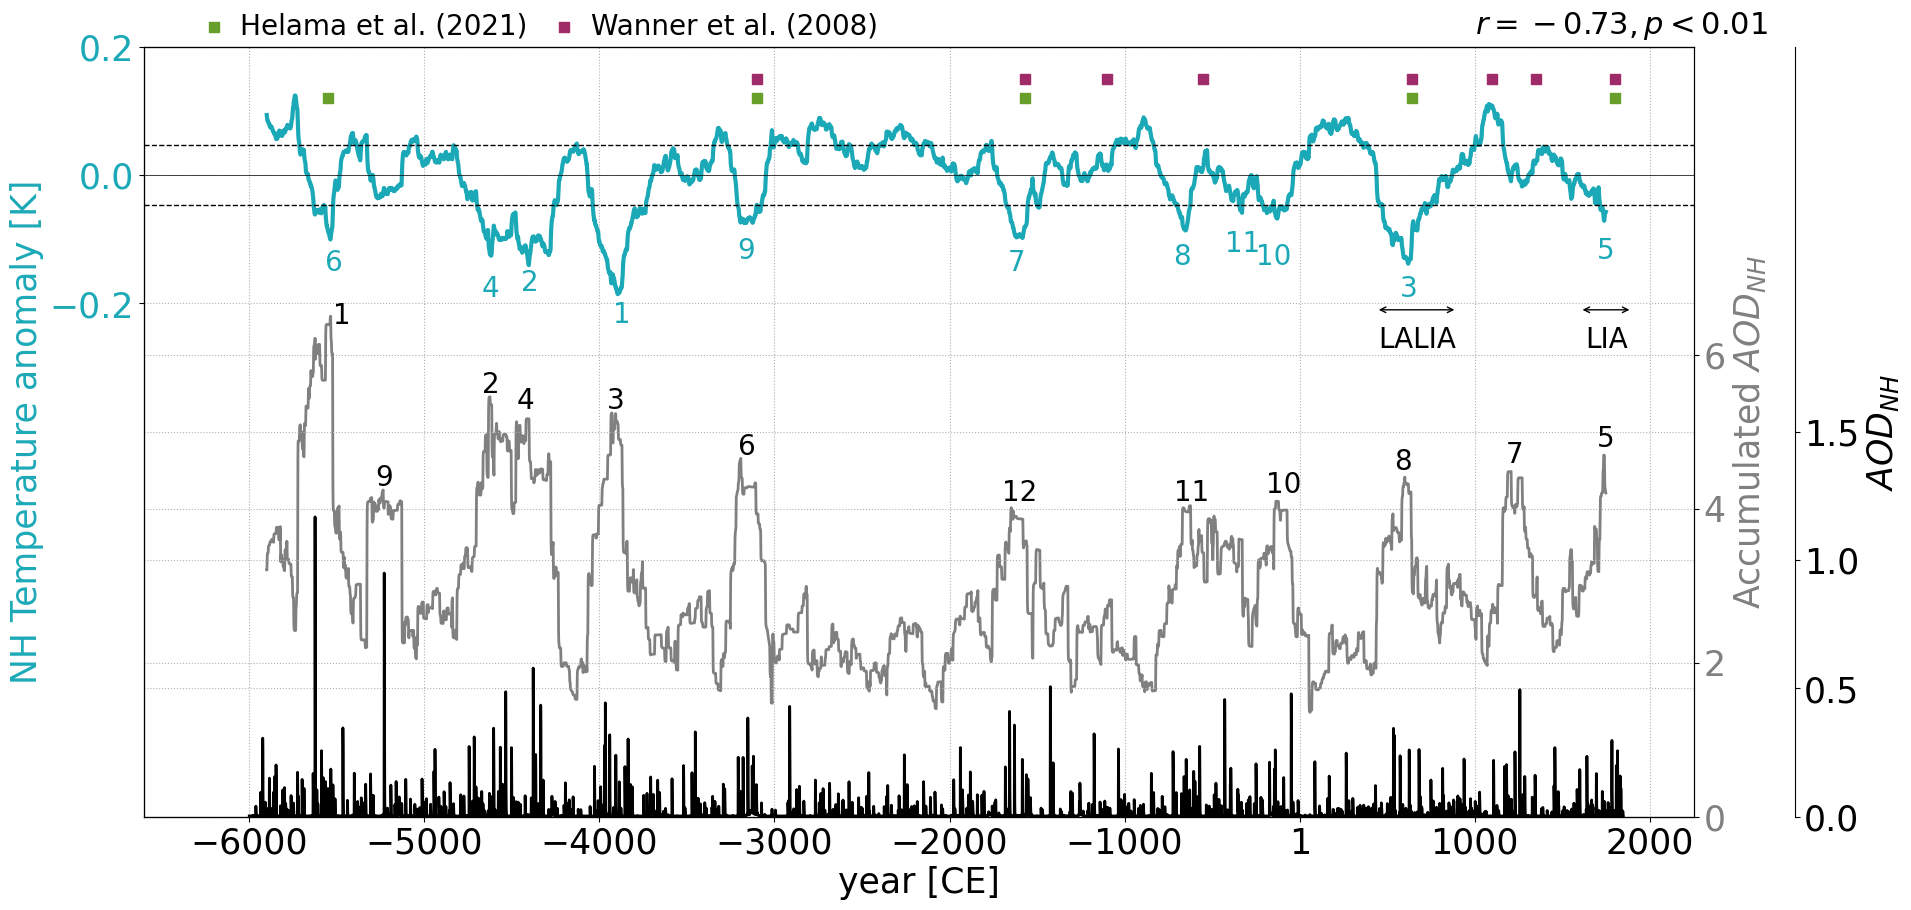

In [68]:
# Figure 200-year mean temperature and accumulated AOD

fig, ax = plt.subplots(figsize=(20,10))
fig.subplots_adjust(hspace = 0.2)

x_Helama = [-5550,-3100,-1570,640,1800]
y_Helama = [0.12,0.12,0.12,0.12,0.12]

x_Wanner = [-3100,-1570,-1100,-550,640,1100,1350,1800]
y_Wanner = [0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15]

x_solmin = [-6000,-5600,-5450,-5300,-5200,-4300,-4200,-3620,-3500,-3320,-2850,-2450,-1380,-750,-350,700,1050,1300,1480,1680]
y_solmin = [0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18,0.18]

x_social = [-4620, -4400, -3900, -3170, 570, 1700]
y_social = [0.09, 0.09, 0.09, 0.09, 0.09, 0.09]
#------------------------------------temperature---------------------------------------------------------

#ax.plot(time, tas_NH_a['var167'][:,0,0]+0.2, color = '#1ca9b7')
ax.plot(time_200acc, tas_NH_detr_200yr[100:-100], color = '#1ca9b7', linewidth = 3)
#ax.plot(time_200acc, tas_NH_detr_200yr[:-200,0,0], color = '#689f2b', linewidth = 2)

#ax.axhline(0+tas_2sig_novolc, color='black', linewidth=0.5, linestyle='dashed')
#ax.axhline(0-tas_2sig_novolc, color='black', linewidth=0.5, linestyle='dashed')

ax.axhline(0+tas_NH_novolc_200yr_2sig, color='black', linewidth=1, linestyle='dashed')
ax.axhline(0-tas_NH_novolc_200yr_2sig, color='black', linewidth=1, linestyle='dashed')
#ax.axhline(0+tas_NH_200yr_2sig, color='black', linewidth=1, linestyle='dashdot',alpha=0.5)
#ax.axhline(0-tas_NH_200yr_2sig, color='black', linewidth=1, linestyle='dashdot',alpha=0.5)

ax.annotate(text="", xy=(436,-0.21), xytext=(900,-0.21), arrowprops=dict(arrowstyle='<->'))
ax.text(450,-0.27,'LALIA',fontsize=20)

#ax.annotate(text="", xy=(1250,-0.25), xytext=(1500,-0.25), arrowprops=dict(arrowstyle='<->'))
#ax.text(1200,-0.3,'LIA I',fontsize=20)

ax.annotate(text="", xy=(1600,-0.21), xytext=(1900,-0.21), arrowprops=dict(arrowstyle='<->'))
ax.text(1630,-0.27,'LIA',fontsize=20)

ax.axhline(0, color='black', linewidth=0.5)

ax.grid(linestyle=':')
ax.set_ylim(-1.0,0.2)
ax.set_yticks([-0.2,0,0.2])
ax.set_ylabel('NH Temperature anomaly [K]', fontsize=25, color='#1ca9b7')
ax.set_xlabel('year [CE]', fontsize=25)
ax.tick_params(labelsize=25)

ax.text(1000,0.22,'$r = -0.73, p<0.01$', fontsize=22)

ax.text(-5570,-0.15,'6', fontsize=20, color='#1ca9b7')
ax.text(-4670,-0.19,'4', fontsize=20, color='#1ca9b7')
ax.text(-4450,-0.18,'2', fontsize=20, color='#1ca9b7')
ax.text(-3920,-.23,'1', fontsize=20, color='#1ca9b7')
ax.text(-3210,-0.13,'9', fontsize=20, color='#1ca9b7')
ax.text(-1670,-0.15,'7', fontsize=20, color='#1ca9b7')
ax.text(-720,-0.14,'8', fontsize=20, color='#1ca9b7')
ax.text(-429,-0.12,'11', fontsize=20, color='#1ca9b7')
ax.text(-250,-0.14,'10', fontsize=20, color='#1ca9b7')
ax.text(570,-0.19,'3', fontsize=20, color='#1ca9b7')
#ax.text(1180,-0.12,'12', fontsize=20, color='#1ca9b7')
ax.text(1700,-0.13,'5', fontsize=20, color='#1ca9b7')

#ax.text(-5280,-0.09,'12', fontsize=20, color='#1ca9b7')

#ax.scatter(x_social, y_social, s=100, marker='*', color='#b72a1c')


ax.scatter(x_Wanner,y_Wanner,s=50,marker='s', color = '#9F2B68')
ax.scatter(x_Helama,y_Helama,s=50,marker='s',color = '#689f2b')
#ax.scatter(x_solmin,y_solmin,s=50,marker='s',color = '#eece1a')

ax.scatter(-6200,0.23, clip_on=False,s=50,marker='s',color = '#689f2b')
ax.text(-6050, 0.22, 'Helama et al. (2021)', fontsize = 20)
#ax.text(-6050, 0.22, 'Tree rings N-Finland', fontsize = 20)
ax.scatter(-4200,0.23, clip_on=False,s=50,marker='s', color = '#9F2B68')
#ax.text(-4050,0.22, 'Glacier advances NH', fontsize = 20)
ax.text(-4050,0.22, 'Wanner et al. (2008)', fontsize = 20)
#ax.scatter(-2200,0.23, clip_on=False,s=50,marker='s', color = '#eece1a')
#ax.text(-2050,0.22, 'Usoskin (2017)', fontsize = 20)
#ax.text(-2050,0.22, 'Grand solar minima', fontsize = 20)

#ax.scatter(-600,0.23, clip_on=False, s=100, marker='*', color = '#b72a1c')
#ax.text(-450,0.22, 'Societal change', fontsize = 20)

[t.set_color('#1ca9b7') for t in ax.yaxis.get_ticklabels()]

#------------------------------------- accumulated AOD ---------------------------------------------------
ax2 = ax.twinx()

ax2.plot(time_200acc, max_aod_acc_200yr_xr, color = 'grey', linewidth = 2)

#ax2.axhline(3.9, color = 'grey', linestyle = 'dashed', alpha=0.5, linewidth = 2)

ax2.grid(linestyle=':')

ax2.set_ylim(0,10)
ax2.set_yticks([0,2,4,6])
ax2.set_ylabel(r'Accumulated $AOD_{NH}$', fontsize=25, color = 'grey')
ax2.tick_params(labelsize=25)

[t.set_color('grey') for t in ax2.yaxis.get_ticklabels()]

ax2.text(-5520,6.4,'1', fontsize=20)
ax2.text(-4670,5.5,'2', fontsize=20)
ax2.text(-3960,5.3,'3', fontsize=20)
ax2.text(-4470,5.3,'4', fontsize=20)
ax2.text(1700,4.8,'5', fontsize=20)
ax2.text(-3210,4.7,'6', fontsize=20)
ax2.text(1180,4.6,'7', fontsize=20)
ax2.text(540,4.5,'8', fontsize=20)
ax2.text(-5280,4.3,'9', fontsize=20)
ax2.text(-190,4.2,'10', fontsize=20)
ax2.text(-720,4.1,'11', fontsize=20)
ax2.text(-1700,4.1,'12', fontsize=20)

ax1 = ax.twinx()

ax1.plot(time[:],aod_awa, linewidth=2, color = 'black')

ax1.grid(linestyle=':')
ax1.spines['right'].set_position(('axes',1.065)) #get double y-axis on right side
ax1.set_ylim(0,3)
ax1.set_yticks([0,0.5,1.0,1.5])
ax1.set_ylabel(r'$AOD_{NH}$', fontsize=25)
ax1.set_xlabel('year [CE]', fontsize=25)
ax1.set_xticks([-6000,-5000,-4000,-3000,-2000,-1000,1,1000,2000])
ax1.tick_params(labelsize=25)



#plt.savefig('figures/tas_NH_a_200yrfilter_tas_AOD_noym_addons_spline.png', bbox_inches = 'tight')

In [69]:
# Plot running mean also for 10/20/50/100/300/400 years
tas_NH_detr_10yr = uniform_filter1d(tas_NH_detr,size=10, axis=0)

## Make distribution plot forcing and cooling 


In [70]:
from scipy.signal import find_peaks

In [71]:
peaks = find_peaks(aod_awa,0.08)

In [72]:
cluster_int = np.array([np.where(np.diff(peaks[0])<10)]).flatten()

In [73]:
cluster = np.unique(sorted(np.concatenate((cluster_int, cluster_int +1))))

In [74]:
single_eruptions = np.delete(peaks[0], cluster)

In [75]:
# find extratropical/tropical eruptions --> single eruptions
lats = []
for i in single_eruptions:
    a = np.where(aod['aod550'][i,:] == np.nanmax(aod['aod550'][i,:]))
    lats = np.append(lats, aod['lat'][a])

In [76]:
tropical = single_eruptions[np.where((lats<40)&(lats>-40))]
extratropical = single_eruptions[np.where((lats>40))]

In [77]:
# Calculate accumulated AOD for 10 years after all large eruptions >0.08

aod_acc_10yr_all = []
aod_acc_10yr_se = []
aod_acc_10yr_tr = []
aod_acc_10yr_extr = []
aod_acc_10yr_db = []

aod_lat_acc_10yr_all = []
aod_lat_acc_10yr_se = []
aod_lat_acc_10yr_tr = []
aod_lat_acc_10yr_extr = []
aod_lat_acc_10yr_db = []


for i in single_eruptions:
    aod_acc_10yr_se.append(np.cumsum(aod_awa[i:i+10]))
    aod_lat_acc_10yr_se.append(np.cumsum(aod['aod550'][i:i+10,:], axis=0))
    
for i in peaks[0]:
    aod_acc_10yr_all.append(np.cumsum(aod_awa[i:i+10]))
    aod_lat_acc_10yr_all.append(np.cumsum(aod['aod550'][i:i+10,:], axis=0))
        
for i in extratropical:
    aod_acc_10yr_extr.append(np.cumsum(aod_awa[i:i+10]))
    aod_lat_acc_10yr_extr.append(np.cumsum(aod['aod550'][i:i+10,:], axis=0))
    
for i in tropical:
    aod_acc_10yr_tr.append(np.cumsum(aod_awa[i:i+10]))
    aod_lat_acc_10yr_tr.append(np.cumsum(aod['aod550'][i:i+10,:], axis=0))
    
for i in peaks[0][cluster]:
    aod_acc_10yr_db.append(np.cumsum(aod_awa[i:i+10]))
    aod_lat_acc_10yr_db.append(np.cumsum(aod['aod550'][i:i+10,:], axis=0))

In [78]:
# Only max value

max_aod_acc_10yr_all = []
max_aod_acc_10yr_se = []
max_aod_acc_10yr_tr = []
max_aod_acc_10yr_extr = []
max_aod_acc_10yr_db = []

for i in np.arange(0,189,1):
    max_aod_acc_10yr_all.append(aod_acc_10yr_all[i][-1])

for i in np.arange(0,135,1):
    max_aod_acc_10yr_se.append(aod_acc_10yr_se[i][-1])
    
for i in np.arange(0,79,1):
    max_aod_acc_10yr_tr.append(aod_acc_10yr_tr[i][-1])
    
for i in np.arange(0,55,1):
    max_aod_acc_10yr_extr.append(aod_acc_10yr_extr[i][-1])
    
for i in np.arange(0,54,1):
    max_aod_acc_10yr_db.append(aod_acc_10yr_db[i][-1])
    
#max_aod_acc_10yr_all

In [79]:
# Split for defined sections
tas_detr_10yr_db = tas_NH_detr_10yr[peaks[0][cluster]].squeeze()

In [80]:
tas_detr_10yr_tr = tas_NH_detr_10yr[tropical].squeeze()
tas_detr_10yr_extr = tas_NH_detr_10yr[extratropical].squeeze()
tas_detr_10yr_se = tas_NH_detr_10yr[single_eruptions].squeeze()
tas_detr_10yr_all = tas_NH_detr_10yr[peaks[0]].squeeze()

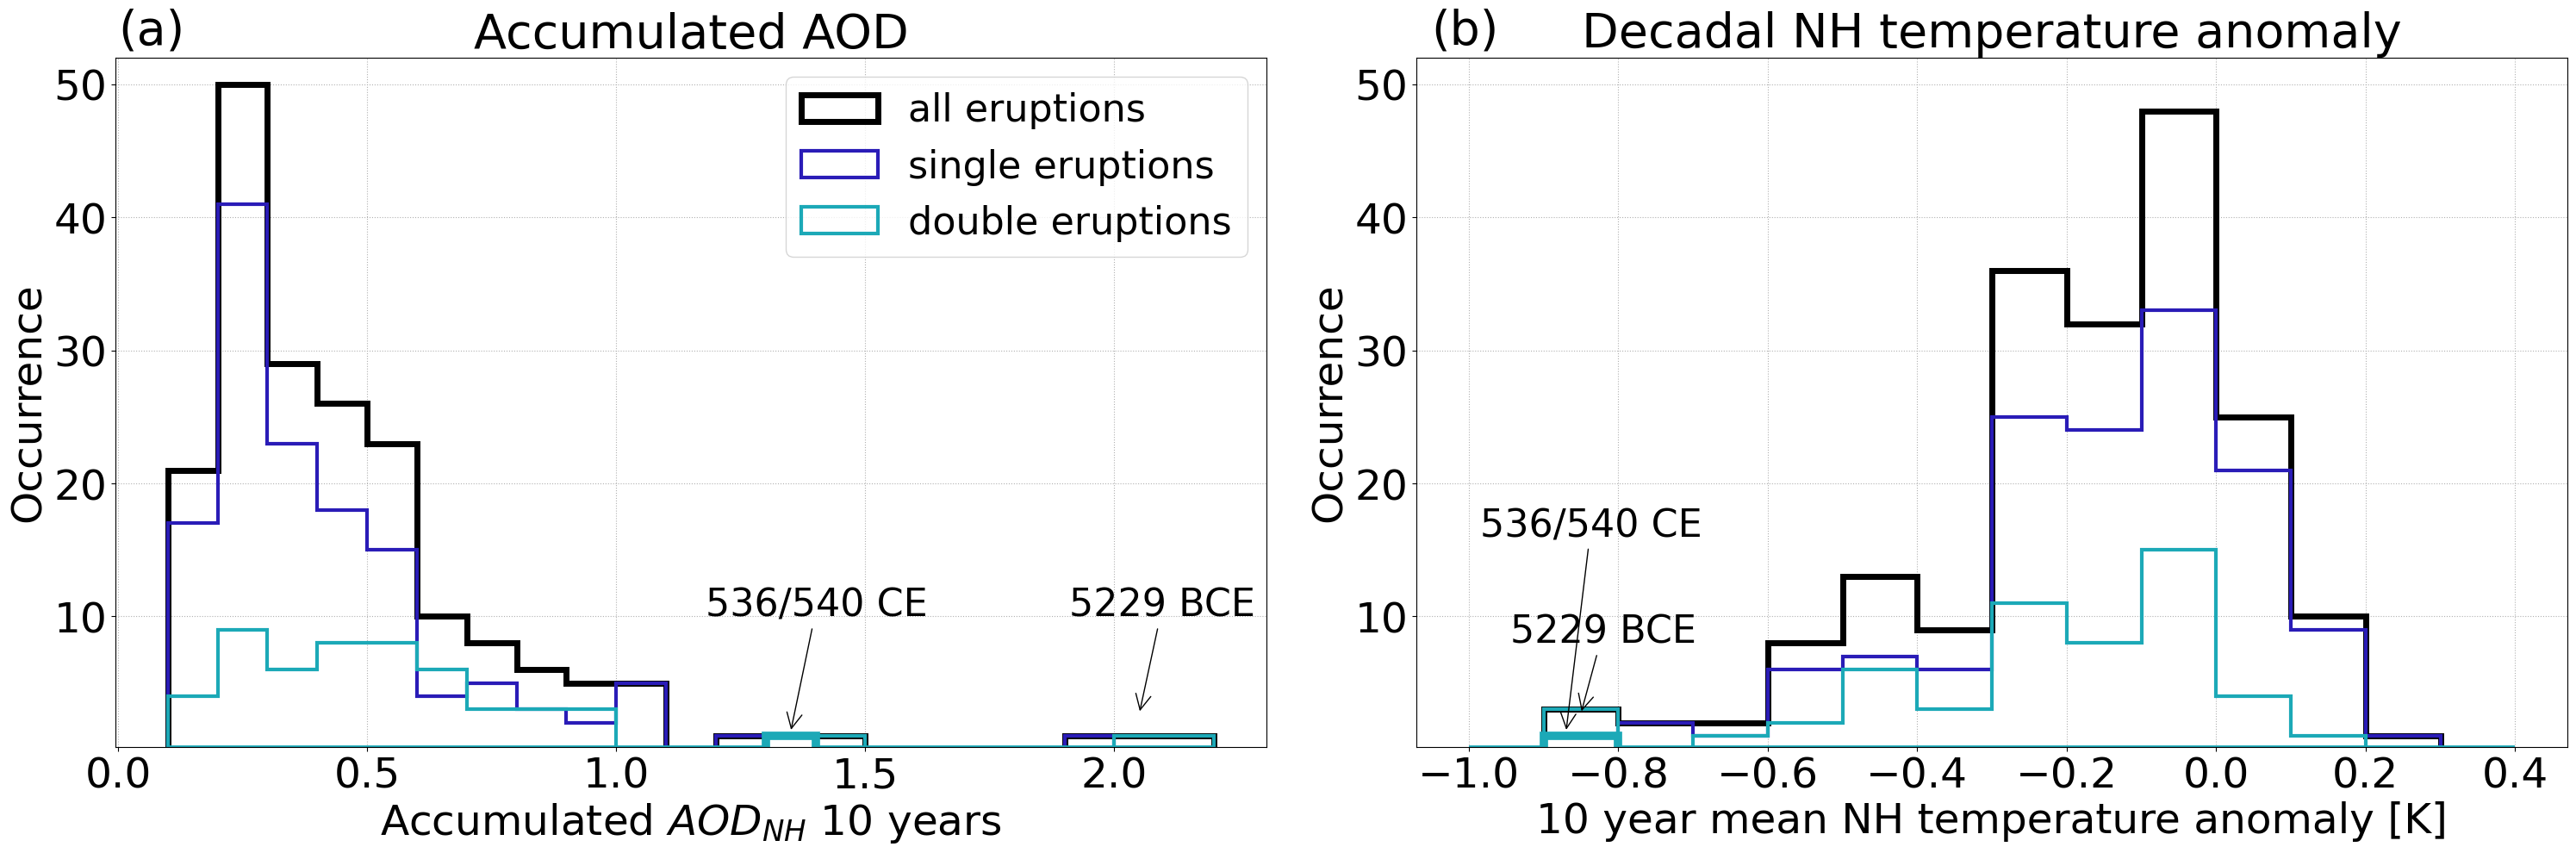

In [82]:
# Figures distribution decadal temps and AOD

fig, axs = plt.subplots(1,2, figsize=(30,10))
fig.subplots_adjust(wspace=0.2)

#------------------------------------- AOD ------------------------------------------------------------
ax1 = plt.subplot(1,2,1)
                  
ax1.hist(max_aod_acc_10yr_all, bins = np.arange(0.1,2.3,0.1), histtype = 'step', color='black', linewidth = 5, label = 'all eruptions')  

ax1.hist(max_aod_acc_10yr_se, bins = np.arange(0.1,2.3,0.1), histtype = 'step', color='#2a1cb7', linewidth = 3, label = 'single eruptions')  

#ax1.hist(max_aod_acc_10yr_tr, bins = np.arange(0.1,2.3,0.1), histtype = 'step', color='#9F2B68', linewidth = 3, label = 'tropical eruptions')  

#ax1.hist(max_aod_acc_10yr_extr, bins = np.arange(0.1,2.3,0.1), histtype = 'step', color='#689f2b', linewidth = 3, label = 'extratropical eruptions')  

ax1.hist(max_aod_acc_10yr_db, bins = np.arange(0.1,2.3,0.1), histtype = 'step', color='#1ca9b7', linewidth = 3, label = 'double eruptions')  
ax1.hist(max_aod_acc_10yr_db[-12], bins = np.arange(0.1,2.3,0.1), histtype = 'step', color='#1ca9b7', linewidth = 7, label = '_nolegend_')
ax1.annotate(text='536/540 CE', xy=(1.35,1.3), xytext=(1.18,10), arrowprops=dict(arrowstyle='->'), fontsize=32)
ax1.annotate(text='5229 BCE', xy=(2.05,2.7), xytext=(1.91,10), arrowprops=dict(arrowstyle='->'), fontsize=32)

ax1.grid(linestyle=':')
ax1.set_xlabel(r'Accumulated $AOD_{NH}$ 10 years', fontsize=35)
ax1.set_ylim(0.2,52)
ax1.set_ylabel('Occurrence', fontsize=35)
ax1.tick_params(labelsize=35)
ax1.legend(loc='upper right',fontsize=32)
ax1.set_title('Accumulated AOD', fontsize=40)

ax1.text(0,53,'(a)', fontsize=40)

#------------------------------------- TAS ------------------------------------------------------------
ax2 = plt.subplot(1,2,2)

ax2.hist(tas_detr_10yr_all, bins = np.arange(-1.0,0.5,0.1), histtype = 'step', color='black', linewidth = 5, label = 'all eruptions')  

ax2.hist(tas_detr_10yr_se, bins = np.arange(-1.0,0.5,0.1), histtype = 'step', color='#2a1cb7', linewidth = 3, label = 'single eruptions')  

#ax2.hist(tas_a_10yr_tr, bins = np.arange(-1.0,0.5,0.1), histtype = 'step', color='#9F2B68', linewidth = 3, label = 'tropical eruptions')  

#ax2.hist(tas_a_10yr_extr, bins = np.arange(-1.0,0.5,0.1), histtype = 'step', color='#689f2b', linewidth = 3, label = 'extratropical eruptions')  

ax2.hist(tas_detr_10yr_db, bins = np.arange(-1.0,0.5,0.1), histtype = 'step', color='#1ca9b7', linewidth = 3, label = 'double eruptions')  
ax2.hist(tas_detr_10yr_db[-11], bins = np.arange(-1.0,0.5,0.1), histtype = 'step', color='#1ca9b7', linewidth = 7, label = '536 CE')
ax2.annotate(text='536/540 CE', xy=(-0.87,1.3), xytext=(-0.985,16), arrowprops=dict(arrowstyle='->'), fontsize=32)
ax2.annotate(text='5229 BCE', xy=(-0.85,2.7), xytext=(-.945,8), arrowprops=dict(arrowstyle='->'), fontsize=32)

ax2.grid(linestyle=':')
ax2.set_xlabel('10 year mean NH temperature anomaly [K]', fontsize=35)
ax2.set_ylim(0.2,52)
ax2.set_ylabel('Occurrence', fontsize=35)
ax2.tick_params(labelsize=35)
#ax2.legend(loc='upper right',fontsize=25)
ax2.set_title('Decadal NH temperature anomaly', fontsize=40)

ax2.text(-1.05,53,'(b)', fontsize=40)

#------------------------------------------------------------------------------------------------------------------

fig.tight_layout()

#plt.savefig('figures/hist_acc_AOD_10yr_tas_se_db_spline.png')